In [2]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs matplotlib inline

In [3]:
train=pd.read_csv("loan_train.csv")
test=pd.read_csv("loan_test.csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


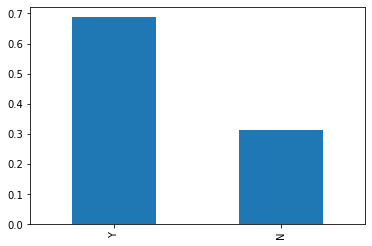

In [5]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

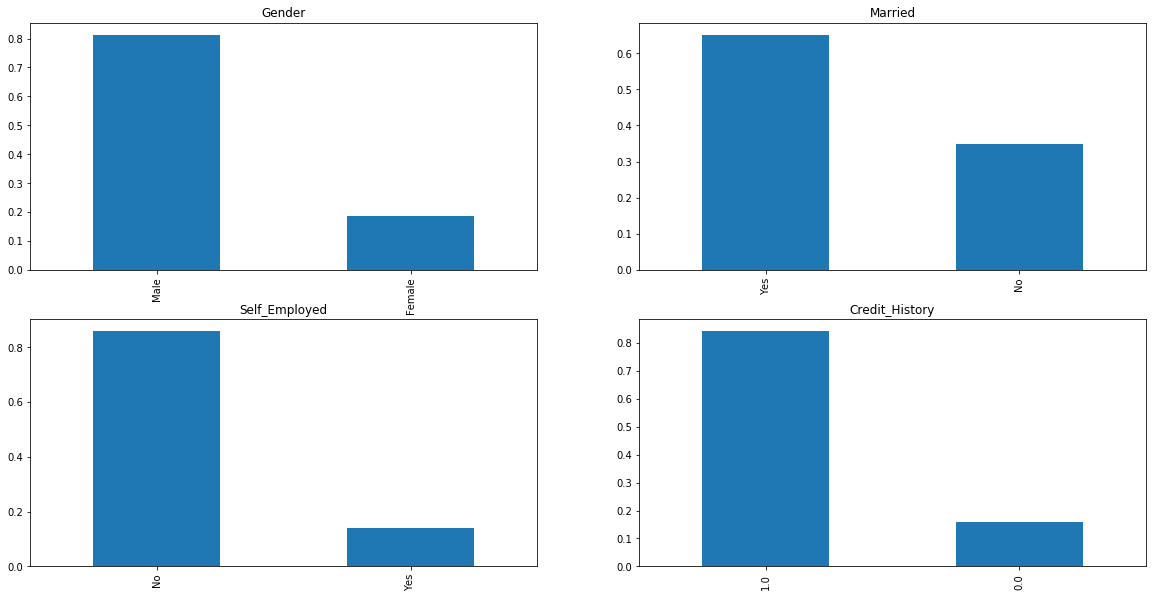

In [6]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

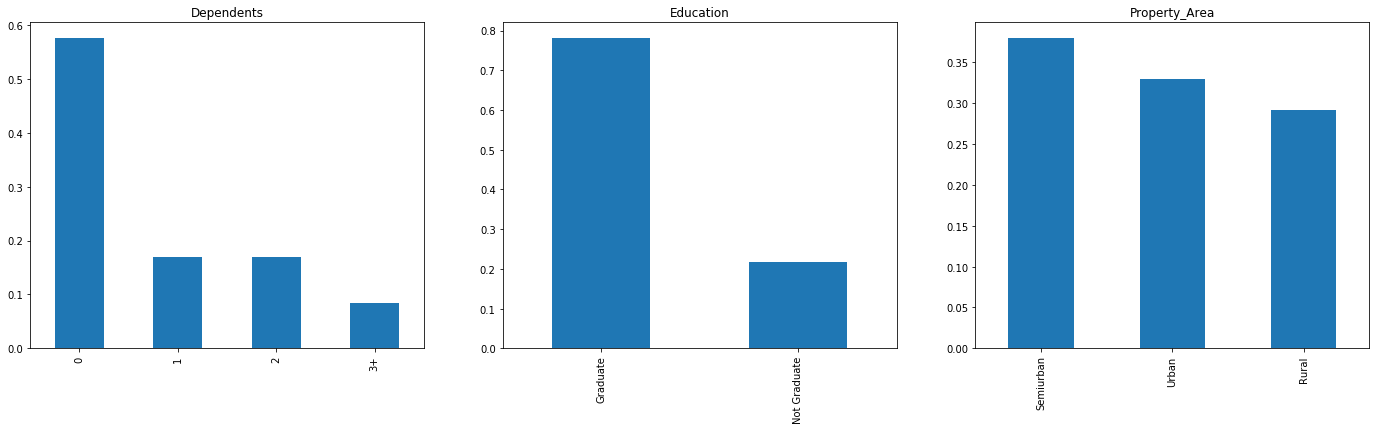

In [7]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

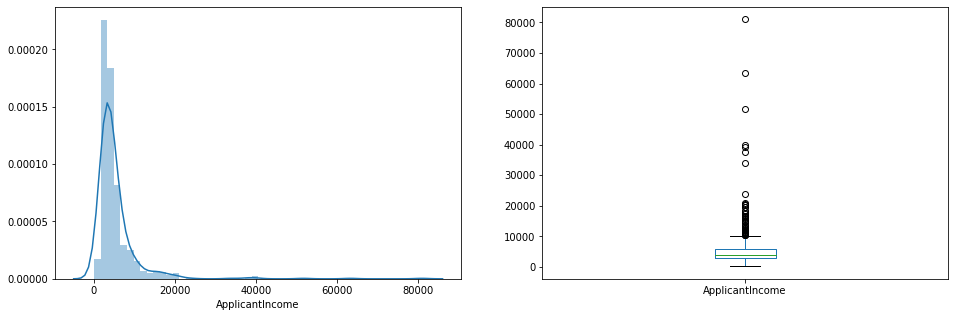

In [8]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [11]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [12]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [13]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

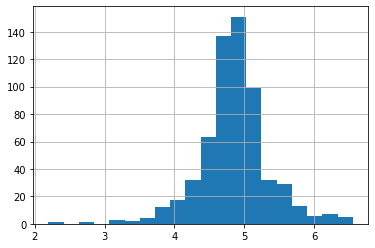

In [16]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [17]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [18]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [19]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,penalty='l2',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

#Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.
#To learn about other parameters, refer here: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

C:\Users\20302943\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [24]:
pred_cv = model.predict(x_cv)

In [26]:
accuracy_score(y_cv,pred_cv)

0.8324324324324325

In [27]:
pred_test = model.predict(test)

In [29]:
submission=pd.read_csv("loan_Sample_Submission.csv")

In [31]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [32]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')